# COMPONENT 1 - WEB SCRAPING MODULE

### IMPORTING THE LIBRARIES

In [ ]:
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd
import re
import os

## EXTRACTING NEWS DATA FOR TWO WEEKS (Feb 1, 2021 to Feb 14, 2021)

### LIST OF URLS OF 14 DAYS:

The urls of the web pages are as follows:

https://www.thehindu.com/archive/web/2021/02/01/

https://www.thehindu.com/archive/web/2021/02/02/ 

................

https://www.thehindu.com/archive/web/2021/02/14/

Since the urls follow a similar pattern, we can create the list of all the urls as follows:

In [ ]:
num_list = [ "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14"]

In [ ]:
webpage_links = []
for i in range(len(num_list)):
  link = "https://www.thehindu.com/archive/web/2021/02/{0}/".format(num_list[i])
  webpage_links.append(link)

In [ ]:
webpage_links

['https://www.thehindu.com/archive/web/2021/02/01/',
 'https://www.thehindu.com/archive/web/2021/02/02/',
 'https://www.thehindu.com/archive/web/2021/02/03/',
 'https://www.thehindu.com/archive/web/2021/02/04/',
 'https://www.thehindu.com/archive/web/2021/02/05/',
 'https://www.thehindu.com/archive/web/2021/02/06/',
 'https://www.thehindu.com/archive/web/2021/02/07/',
 'https://www.thehindu.com/archive/web/2021/02/08/',
 'https://www.thehindu.com/archive/web/2021/02/09/',
 'https://www.thehindu.com/archive/web/2021/02/10/',
 'https://www.thehindu.com/archive/web/2021/02/11/',
 'https://www.thehindu.com/archive/web/2021/02/12/',
 'https://www.thehindu.com/archive/web/2021/02/13/',
 'https://www.thehindu.com/archive/web/2021/02/14/']

### CREATING A LIST OF ALL THE URLS FROM THE WEBPAGES OF 14 DAYS:
### FROM FEB 1, 2021 TO FEB 14, 2021


In [ ]:
URL_list = []
for link in webpage_links:
  page = requests.get(link)
  soup = BeautifulSoup(page.content, "html.parser")
  for item in soup.find_all(attrs={'class':'archive-list'}):
    for link in item.find_all(href=True):
        href=link.get('href')
        URL_list.append(href)

In [ ]:
len(URL_list)

5565

### CREATING A LIST OF JSON FILES

In [ ]:
json_files = []
for i in range(len(URL_list)):
  json_files.append('thehindu_feb_02_file_{0}.json'.format(i))

### EXTRACTING THE USEFUL CONTENT FROM THE URLs:

In [ ]:
for i in range(len(URL_list)):
  news_data = {"text" : []}
  page = requests.get(URL_list[i])
  soup = BeautifulSoup(page.content, "html.parser")

#SCRAPING THE TITLE OF THE WEBPAGE
  title = soup.find('h1')
  if title!= None:
    news_data["text"].append(title.text)

#SCRAPING THE SUB TITLE OF THE WEBPAGE
  sub_title = soup.find_all('h2')
  if sub_title != None:
    for st in sub_title:
      news_data["text"].append(st.text)

      
#SCRAPING CONTENT FROM PARAGRAPH TAGS WITH A SPECIFIC ID
  regex = re.compile('.*content-body-.*')
  for item in soup.find_all("div", {'id': regex}):
    for p in item.find_all('p'):
      news_data["text"].append(p.text)  

#STORING THE CONTENT FROM EACH WEBPAGE IN A SEPARATE JSON FILE
  with open(json_files[i], 'w') as jsonfile:
    json.dump(news_data, jsonfile)

#SAVING THE JSON FILES IN GOOGLE DRIVE
  !cp {json_files[i]} /content/drive/MyDrive/JSON_FILES2


### STORING THE TEXT FROM EACH FILE IN A LIST

In [ ]:
raw_text = []
for js in json_files:
   with open(js) as json_file:
        json_text = json.load(json_file)
        raw_text.append(json_text['text'])

### SAVING THE RAW TEXT IN A SEPARATE .JSON FILE

In [ ]:
#To save the data from Feb 1 to Feb 7
with open('raw_text_01.json', 'w') as jsonfile:
   json.dump(raw_text, jsonfile)
!cp raw_text_01.json /content/drive/MyDrive/RAW_TEXT

In [ ]:
#To save the data from Feb 8 to Feb 14
with open('raw_text_02.json', 'w') as jsonfile:
    json.dump(raw_text, jsonfile)
!cp raw_text_02.json /content/drive/MyDrive/RAW_TEXT

## CREATING A DATAFRAME TO STORE THE FILE NAMES AND THE CORRESPONDING URLs

In [ ]:
tab_head = ["File_Scraped", "Corresponding URL"]
df_data = pd.DataFrame(zip(json_files, URL_list), columns = tab_head)
df_data[:10]

,File_Scraped,Corresponding URL
0,thehindu_feb_02_file_0.json,https://www.thehindu.com/sport/other-sports/va...
1,thehindu_feb_02_file_1.json,https://www.thehindu.com/sport/tennis/advantag...
2,thehindu_feb_02_file_2.json,https://www.thehindu.com/sport/tennis/murray-r...
3,thehindu_feb_02_file_3.json,https://www.thehindu.com/sci-tech/technology/c...
4,thehindu_feb_02_file_4.json,https://www.thehindu.com/sci-tech/technology/e...
5,thehindu_feb_02_file_5.json,https://www.thehindu.com/sci-tech/technology/s...
6,thehindu_feb_02_file_6.json,https://www.thehindu.com/sci-tech/technology/e...
7,thehindu_feb_02_file_7.json,https://www.thehindu.com/sci-tech/technology/m...
8,thehindu_feb_02_file_8.json,https://www.thehindu.com/sci-tech/technology/a...
9,thehindu_feb_02_file_9.json,https://www.thehindu.com/sci-tech/technology/t...


### STORING THE DATAFRAME IN .CSV FILE

In [ ]:
df_data.to_csv('URLs_to_file_mapping.csv', sep ='|')
!cp URLs_to_file_mapping.csv /content/drive/MyDrive/CSV_FILES

### DISPLAYING THE CONTENT IN .CSV FILE

In [ ]:
new_df = pd.read_csv('URLs_to_file_mapping.csv')
new_df.head(10)

,|File_Scraped|Corresponding URL
0,0|thehindu_feb_02_file_0.json|https://www.theh...
1,1|thehindu_feb_02_file_1.json|https://www.theh...
2,2|thehindu_feb_02_file_2.json|https://www.theh...
3,3|thehindu_feb_02_file_3.json|https://www.theh...
4,4|thehindu_feb_02_file_4.json|https://www.theh...
5,5|thehindu_feb_02_file_5.json|https://www.theh...
6,6|thehindu_feb_02_file_6.json|https://www.theh...
7,7|thehindu_feb_02_file_7.json|https://www.theh...
8,8|thehindu_feb_02_file_8.json|https://www.theh...
9,9|thehindu_feb_02_file_9.json|https://www.theh...


In [ ]:
new_df.shape

(5565, 1)

### VIEWING THE RAW DATA

In [ ]:
raw_text = []
f1 = open("/content/drive/MyDrive/RAW_TEXT/raw_text_01.json")
data1 = json.load(f1)
for i in data1:
  raw_text.append(i) 

f2 = open("/content/drive/MyDrive/RAW_TEXT/raw_text_02.json")
data2 = json.load(f2)
for i in data2:
  raw_text.append(i)

In [ ]:
len(raw_text)

5565

# Component 2 - Topic Model

## DATA PREPROCESSING

In [ ]:
#FOR STOP WORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append('n')
stop_words.append('r')

#FOR LEMMATIZATION
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#FOR STEMMING
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#FOR BIGRAMS
from nltk.util import bigrams
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### PERFORMING THE TEXT PREPROCESSING

In [ ]:
filtered_text = []     #TO STORE THE PROCESSED DATA    
for t in raw_text:
    filtered_sentence = ""
    stemmed_list = []
    lemmatized_list = []
    
    sentence = str(t)

    #Data Cleansing
    sentence = re.sub(r'[^\w\s]', ' ', sentence)

    #Removing numbers
    sentence = re.sub(r'[0-9]', '', sentence)
    
    #Tokenization
    words = nltk.word_tokenize(sentence)
    
    #Stop words removal
    words = [w for w in words if not w in stop_words]
    
    #Stemming
    for word in words:
        stemmed_word = stemmer.stem(word)
        stemmed_list.append(stemmed_word)
        
    #Lemmatization
    for s_word in stemmed_list:
        lemmatized_word = lemmatizer.lemmatize(s_word)
        lemmatized_list.append(lemmatized_word)

    #Removing words having length less than 3
    lemmatized_list = [i for i in lemmatized_list if len(i) >= 3]
    
    filtered_text.append(lemmatized_list)

### FREQUENCY DISTRIBUTION PLOT

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist

In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [ ]:
words_list = []
for line in filtered_text:
  for word in line:
    words_list.append(word)

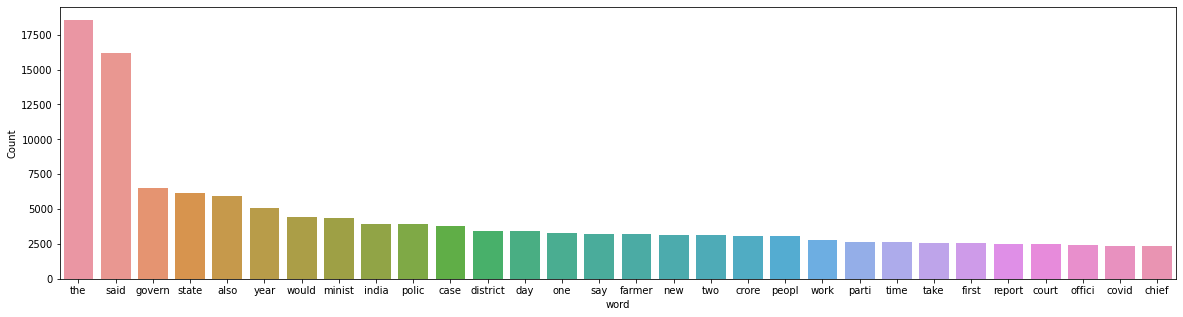

In [ ]:
freq_words(words_list)

Extending the stop words list:

In [ ]:
extra_stopwords = ['the', 'said', 'also', 'would', 'day', 'one', 'say', 'new', 'two', 'take']
stop_words.extend(extra_stopwords)

In [ ]:
words_list = [w for w in words_list if not w in stop_words]

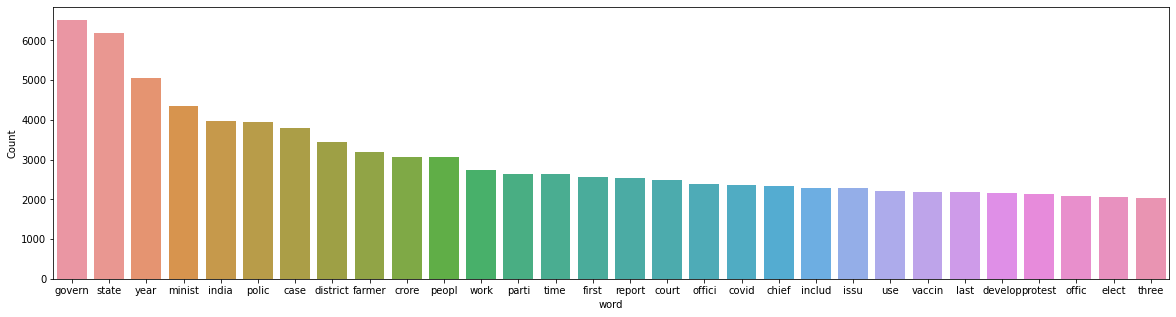

In [ ]:
freq_words(words_list)

### WORD CLOUD

In [ ]:
words_string = " ".join(words_list)

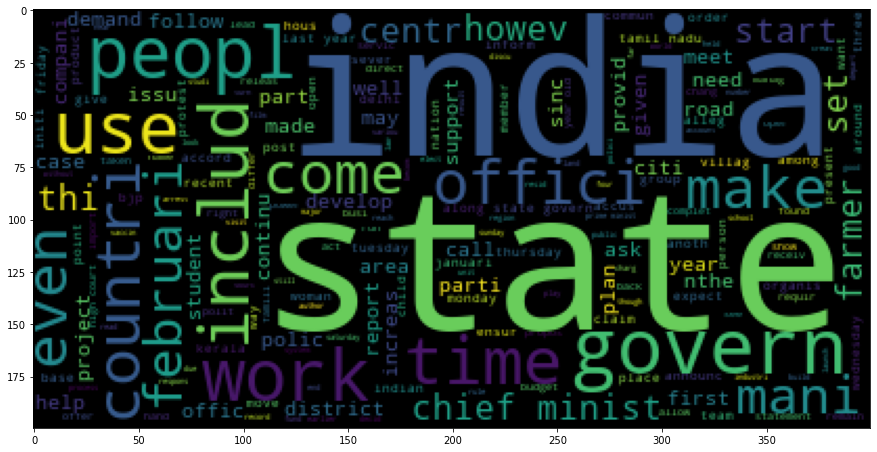

In [ ]:
import wordcloud

wordcloud = wordcloud.WordCloud()
wordcloud.generate(words_string)
plt.figure( figsize=(15,10) )
plt.imshow(wordcloud)


### BIGRAMS FORMATION

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(filtered_text) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[filtered_text])  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
for i in range(len(filtered_text)):
    print(trigram_mod[bigram_mod[filtered_text[i]]])

### FREQUENCY DISTRIBUTION OF BIGRAMS:

In [ ]:
import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

word_fd = nltk.FreqDist(words_list)
bigram_fd = nltk.FreqDist(nltk.bigrams(words_list))

bigram_fd.most_common()[:25]

[(('chief', 'minist'), 1289),
 (('state', 'govern'), 841),
 (('tamil', 'nadu'), 803),
 (('last', 'year'), 763),
 (('high', 'court'), 622),
 (('year', 'old'), 611),
 (('prime', 'minist'), 602),
 (('social', 'medium'), 448),
 (('farm', 'law'), 448),
 (('suprem', 'court'), 396),
 (('financ', 'minist'), 379),
 (('covid', 'vaccin'), 349),
 (('lakh', 'crore'), 345),
 (('farmer', 'protest'), 336),
 (('union', 'budget'), 321),
 (('rajya', 'sabha'), 314),
 (('uttar', 'pradesh'), 292),
 (('polic', 'station'), 281),
 (('test', 'posit'), 281),
 (('andhra', 'pradesh'), 276),
 (('narendra', 'modi'), 267),
 (('covid', 'pandem'), 258),
 (('lok', 'sabha'), 251),
 (('year', 'ago'), 247),
 (('central', 'govern'), 247)]

### FREQUENCY DISTRIBUTION OF TRIGRAMS:

In [ ]:
trigrams=ngrams(words_list,3)
trigram_fd = nltk.FreqDist(trigrams)
trigram_fd.most_common()[:20]

[(('minist', 'narendra', 'modi'), 209),
 (('prime', 'minist', 'narendra'), 207),
 (('financ', 'minist', 'nirmala'), 170),
 (('minist', 'nirmala', 'sitharaman'), 169),
 (('bharatiya', 'janata', 'parti'), 121),
 (('former', 'chief', 'minist'), 117),
 (('jagan', 'mohan', 'reddi'), 113),
 (('chief', 'minist', 'edappadi'), 108),
 (('minist', 'edappadi', 'palaniswami'), 108),
 (('subscrib', 'today', 'cach'), 105),
 (('today', 'cach', 'newslett'), 105),
 (('cach', 'newslett', 'quick'), 105),
 (('newslett', 'quick', 'snapshot'), 105),
 (('quick', 'snapshot', 'top'), 105),
 (('snapshot', 'top', 'tech'), 105),
 (('top', 'tech', 'stori'), 105),
 (('tech', 'stori', 'click'), 105),
 (('stori', 'click', 'subscrib'), 102),
 (('click', 'subscrib', 'free'), 102),
 (('three', 'farm', 'law'), 97)]

### FREQUENCY DISTRIBUTION OF FOURGRAMS

In [ ]:
fourgrams=ngrams(words_list,4)
fourgram_fd = nltk.FreqDist(fourgrams)
fourgram_fd.most_common()[:15]

[(('prime', 'minist', 'narendra', 'modi'), 207),
 (('financ', 'minist', 'nirmala', 'sitharaman'), 162),
 (('chief', 'minist', 'edappadi', 'palaniswami'), 107),
 (('subscrib', 'today', 'cach', 'newslett'), 105),
 (('today', 'cach', 'newslett', 'quick'), 105),
 (('cach', 'newslett', 'quick', 'snapshot'), 105),
 (('newslett', 'quick', 'snapshot', 'top'), 105),
 (('quick', 'snapshot', 'top', 'tech'), 105),
 (('snapshot', 'top', 'tech', 'stori'), 105),
 (('top', 'tech', 'stori', 'click'), 105),
 (('tech', 'stori', 'click', 'subscrib'), 102),
 (('stori', 'click', 'subscrib', 'free'), 102),
 (('chief', 'minist', 'pinarayi', 'vijayan'), 80),
 (('photo', 'credit', 'nspecial', 'arrang'), 79),
 (('read', 'get', 'first', 'first'), 75)]